#### Αριστοτέλειο Πανεπιστήµιο Θεσσαλονίκης
#### Πολυτεχνική Σχολή
##### Τµήµα Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών   
##### Τοµέας Ηλεκτρονικής και Υπολογιστών

---
   
# **Αναγνώριση Προτύπων** (109)     

---

## **Εργασία**
(Μέρη Α έως Γ)

---

#### **Ομάδα 42**

| Επώνυμο        | Όνομα          | ΑΕΜ   | Email                  |
| :------------- | :------------- |:----- | :--------------------- |
| Κυπαρίσσης     | Κυπαρίσσης     | 10346 | kyparkypar@ece.auth.gr |
| Αλεξανδρίδης   | Φώτιος         | 9953  | faalexandr@ece.auth.gr |

---

Η εργασία βρίσκεται και:

* GitHub Repository [[**ΕΔΩ**](https://github.com/Kyparissis/pattern_recognition_assignment)]
* Google Colab Jupyter Notebook [[**ΕΔΩ**](https://colab.research.google.com/drive/13y53_U8_hO_rUe09Wb7j2avkersveFFk?usp=sharing)]

---

##### 4 Ιανουαρίου 2024

---  

# **Περιεχόμενα**

- [Εισαγωγή](#scrollTo=n1YNBkuPIrpi)

   - [Libraries](#scrollTo=Az68Ww41S4H4)

   - [Dataset](#scrollTo=5nPOMnZY-Tm-)

      - [Import](#scrollTo=gjdZhM8iS8k4)

      - [Exploration and visualization](#scrollTo=KulTIGWf-li2)

      - [Splitting and Preprocess](#scrollTo=uIkXZ76pwvpf)

- [**Μέρος Α**](#scrollTo=rNQe_QezHRya)

   - [Bayes Classifier (Same covariance matrix)](#scrollTo=-mmNaekrZxRY)

   - [Bayes Classifier (Different covariance matrix)](#scrollTo=BQxjjscTsy5g)

   - [Σχολιασμός](#scrollTo=4pTLt2262Bey)

- [**Μέρος B**](#scrollTo=QZ-8BZNLHV_Z)

   - [k - NN Classifier](#scrollTo=QZ-8BZNLHV_Z)

   - [Συγκριτικός Σχολιασμός](#scrollTo=s7Jc4ogS2Gk2)

- [**Μέρος Γ**](#scrollTo=rq4xoKMkHaxJ)

   - [SVM (Linear Kernel) Classifier](#scrollTo=5uXrzQ1Rs2uY)

   - [SVM (RBF Kernel) Classifier](#scrollTo=RzzDruvXs9vP)

      - [Πειραματισμός με υπερπαραμέτρους](#scrollTo=0seOOSr2AMMf)

   - [Συγκριτικός Σχολιασμός](#scrollTo=PE3GPn1j2Kj1)



---

# **Εισαγωγή**

Η εργασία αυτή έχει ως στόχο τον πειραματισμό με κάποια classification μοντέλα, η εξαγωγή συμπερασμάτων και η συγκρίση των μοντέλων αυτών μεταξύ τους. Πιο συγκεκριμένα, γίνεται μέλετη ενός Bayes Classifier εκπαιδευόμενος με τη Maximum Likelihood τεχνική (χρησιμοποιώντας κανονικές κατανομές) και για τις περιπτώσεις όπου έχουμε ιδιο πίνακα συνδιασποράς για όλες τις κλάσεις ή και διαφορετικό, ενός k-NN Classifier για διάφορες τιμές του $k$ και ενός Support Vector Machine (SVM), όπου γίνεται μελέτη της περίπτωσης που έχουμε linear kernel ή Radial basis function (rbf) kernel (στην δεύτερη περίπτωση μάλιστα γίνεται και ένας πειραματισμός με τις υπερπαραμέτρους).

Η υλοποίηση των μοντέλων γίνεται κυρίως με την χρήση της Python βιβλιοθήκης **scikit-learn** (`sklearn`) καθώς παρέχει πολλές έτοιμες συναρτήσεις για την προεπεξεργασία (preprocess) του dataset, για την ανάπτυξη των μοντέλων και για τις μετρικές αυτών αλλά και πολλές βοηθητικές συναρτήσεις για την οπτικοποιήση (visualization).

Για την σύγκριση των μοντέλων μεταξύ τους ζητήθηκε να γίνει η χρήση της μετρικής του μέσου σφάλματος ταξινόμησης στο test set. Μιλάμε δηλαδή, για την μετρική του Zero-one classification loss  (`zero_one_loss`), όπου ουσιαστικά προκύπτει με τον παρακάτω τύπο:

$$\begin{equation}
    e = \frac{\sum_{}{\text{Wrongly classified test samples}}}{\sum_{}{\text{Test samples}}}
\end{equation}$$

, o οποίος ουσιαστικά έχει τιμή ίση με το ($1 - accuracy$)

Το dataset που θα χρησιμοποιηθεί προς μελέτη στην εργασία αυτή είναι το `dataset.csv` (δόθηκε από την εκφώνηση της εργασίας) .

## Libraries

Παρακάτω εγκαθιστούμε και εισάγουμε όλες τις απαραίτητες βιβλιοθήκες για την εκτέλεση όλων των κομματίων κώδικα που χρειάστηκαν για την εργασία αυτή μέσω του Python package manager $\texttt{PIP}$ .

In [ ]:
%%capture
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import zero_one_loss
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm

## Dataset

Παρακάτω φορτώνουμε, εξερευνούμε και κάνουμε visualize αλλά και προεπεξεργαζόμαστε τα δεδομένα του `dataset.csv` (σύμφωνα με τις οδηγίες που δόθηκαν στην εκφώνηση της εργασίας) το οποίο ανεβάσαμε πρώτα σε ένα [GitHub repository](https://github.com/Kyparissis/pattern_recognition_assignment) (για διευκόλυνση του download μέσω $Git$).

### Import

In [ ]:
%%capture
!git clone https://github.com/Kyparissis/pattern_recognition_assignment

In [ ]:
dataset_df = pd.read_csv('/content/pattern_recognition_assignment/dataset.csv',
                         delimiter=',',
                         skip_blank_lines=True,
                         names=["(Feature #1)", "(Feature #2)", "Label"],
                         dtype={"(Feature #1)":np.float64, "(Feature #2)":np.float64, "Label":np.intc})

### Exploration and visualization

In [ ]:
# Drop any samples that have nan values
dataset_df = dataset_df.dropna()

display(dataset_df)

,(Feature #1),(Feature #2),Label
0,1.80360,4.4229,3
1,3.46150,4.1436,2
2,2.18730,3.9964,1
3,3.09330,2.9056,1
4,1.75860,2.4109,1
...,...,...,...
275,-0.94428,-1.1722,1
276,1.21990,6.0341,3
277,0.91094,1.1120,1
278,6.24770,4.5430,1


 Πιο συγκεκριμένα, όπως βλέπουμε και παραπάνω αλλα γνωρίζουμε και από την εκφώνηση, έχουμε να δουλέψουμε με ένα $2-D$ dataset **μικρού μεγέθους**, με μόνο 280 δείγματα και 2 χαρακτηριστικά (features) ανα δείγμα (sample) που συνοδεύονται από μια ετικέτα (label) (1, 2 ή 3) στην τελευταία στήλη.   

 Επίσης, βλέπουμε (μέσω του Jupyter Notebook και της προβολής του dataset που κάναμε παραπάνω και μέσω ενός γρήγορο scroll στα δεδομένα - είναι εφικτό λόγω του μικρού όγκου δεδομένων) πως το dataset είναι πλήρες, δηλαδή δεν υπάρχουν δείγματα με κένες τιμές σε κάποιο χαρακτηριστικό ή με λανθασμένη τιμή (δηλαδή να υπάρχει κάποιο string εκεί που θα πρέπει να υπάρχει float ή κάποιος float εκεί που θα έπρεπε να υπάρχει int στα labels). Για να είμαστε και σίγουροι για την ορθότητα των δεδομένων, με την βοήθεια της `dropna()` διάγραψαμε samples που τυχόν είχαν κάποια κενή τιμη.

Τώρα, επιδιώκουμε να κατανοήσουμε σε βάθος το dataset μας και κατ επέκταση το προβλημα που πάμε να λύσουμε.   
Για να το κάνουμε αυτό και για να πάρουμε μια ιδέα με το τι είδους δεδομένα έχουμε να κάνουμε, αρχικά εκτυπώνουμε κάποιες περιγραφικές στατιστικές για κάθε feature του dataset.

In [ ]:
dataset_df.iloc[:, 0:-1].describe()

,(Feature #1),(Feature #2)
count,280.000000,280.000000
mean,2.743918,3.766240
std,1.908206,1.761147
min,-1.083100,-1.172200
25%,1.194250,2.758025
50%,2.429800,3.922450
75%,4.222475,5.071250
max,7.593700,9.850100


Εφόσον κομμάτι της εργασίας αυτής είναι μονάχα η σύγκριση classifiers μεταξύ τους, δεν θα ασχοληθούμε με το normalization των δεδομένων μας. Παρόλο αυτά, μπορούμε να πουμε πως είναι σχεδόν normalized, αφού μ$_1$, μ$_2$ $\approx$ 0 και std$_1$, std$_2$ $\approx$ 1 .

Στην συνέχεια, χώριζουμε στο dataset τις στήλες με τα χαρακτηριστικά (features) (διάνυσμα `X`) και τo label (target) του κάθε δείγματος (διάνυσμα `y`).

In [ ]:
dataset = dataset_df.to_numpy()

# Get all but the last column from the dataset (data) (features)
X = dataset[..., :-1]

# Get the last column from the dataset (labels) (Target variable)
y = dataset[..., -1].astype(int)
y_unique, y_unique_counts = np.unique(y, return_counts=True)

Παρακάτω εκτυπώνουμε και τις διακεκριμένες τιμές των labels που εμφανίζονται στο dataset για επιβεβαίωση.

In [ ]:
print(y_unique)

[1 2 3]


Στην συνέχεια κάνουμε visualize το dataset. Πιο συγκκριμένα, κάνουμε ένα scatter plot για τα features και ενα bar plot για να δούμε τις συχνότητες/κατανομή των labels όλων των samples.

Έτσι μπορούμε επίσης να δούμε και τι είδους preprocess χρειάζεται να κάνουμε στο dataset πριν αρχίσουμε να εκπαιδεύουμε τα μοντέλα μας παρακάτω.

In [ ]:
# This function is used for the plotting in this assignment. This function can plot the input 2-D
# dataset by creating a scatter plot (with discrete coloring for each class/label) and by creating
# a bar chart (with the same coloring)
def plot_dataset(X, y):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), constrained_layout=True)

    # Dataset's features scatter plot
    scatter = ax[0].scatter(X[:, 0], X[:, 1],
                            c = y,
                            edgecolor="k",
                            alpha=0.6)
    ax[0].legend(*scatter.legend_elements(), title='Label')

    # Dataset's labels' bar chart
    y_unique, y_unique_counts = np.unique(y, return_counts=True)
    ax[1].bar(y_unique, y_unique_counts,
              align='center',
              color=['darkslateblue', 'teal', 'yellow'],
              edgecolor = 'k',
              alpha=0.6)
    ax[1].set_xlabel('Label')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xticks(y_unique)

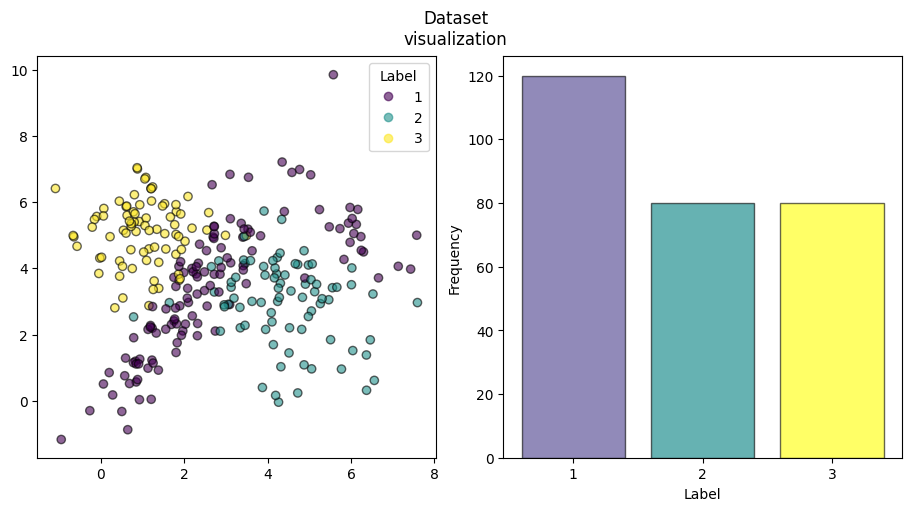

In [ ]:
plot_dataset(X, y)
plt.suptitle('Dataset\nvisualization')
plt.show()

Αρχικά, από το scatter plot (αριστερά) παρατηρούμε πως ΔΕΝ έχουμε outliers (δηλαδή τιμές δειγμάτων πολύ μακριά από όλες τις υπόλοιπες), τους οποίους αν είχαμε θα έπρεπε να αφαίρεσουμε, ειδικά σε ένα μικρό dataset όπως αυτό (καθώς θα είχε μεγάλη επίπτωση, στα μοντέλα μας παρακάτω, λόγω του 'βάρους' που θα είχε η τιμή αυτή).

Επίσης, παρατηρούμε από το bar plot (δεξιά) πως το dataset ΔΕΝ είναι ισορροπημένο ως προς όλες τις τιμές των labels (1, 2 και 3), αφού η κλάση με label 1 έχει περίπου 50% παραπάνω δείγματα από τις άλλες δύο (με labels 2 και 3), που αντιπροσωπεύουν περιίπου το 1/7 του συνολικου dataset. Αυτό μπορεί να δημιουργήσει προβλήματα και biases κατά την εκπαίδευση και αξιόλογηση. Θα δούμε παρακάτω πως θα αντιμετωπίσουμε αυτό το class imbalance, μετά την διαχώριση του dataset.

### Splitting and Preprocess

Τώρα, χωρίζουμε το dataset σε **training** και **testing** subsets με αναλογία 50% - 50%.   

Τον διαχωρισμό τον κάνουμε μία φόρα και σε κάθε μέρος της εργασίας χρησιμοποιούμε το ίδιο train και test set ώστε να μπορούμε να συγκρίνουμε τα μοντέλα μεταξύ τους.

Ορίζουμε `shuffle=True` στην `train_test_split()` ώστε να γίνει απολύτως τυχαία η επιλογή των δεδομένων ενώ επιλέγουμε και ένα σταθερό `random_state` για χάρη της επαναληψιμότητας εκτέλεσης του κώδικα.   

In [ ]:
split_scale = 0.5   # Split into training and test sets with a 50% - 50% ratio

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=split_scale,
                                                    shuffle=True,
                                                    random_state=42)

Για να επιβεβαίωσουμε την σωστή λειτουργία της συνάρτησης για τον διαχωρισμό του dataset `train_test_split()` και να σχολιάσουμε το πρόβλημα του class imbalance, κάνουμε το ίδιο visualization που κάναμε παραπάνω και για τα δύο subsets.

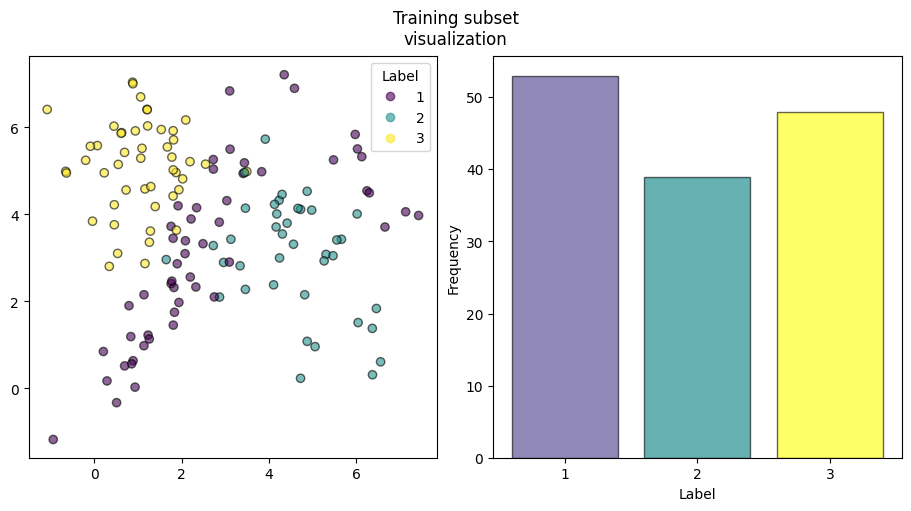

In [ ]:
plot_dataset(X_train, y_train)
plt.suptitle('Training subset\nvisualization')
plt.show()

#### Class Balancing

Θα δούμε τώρα πως θα αντιμετωπίσουμε το class imbalance στο training set.   

Μια σωστή πρακτική, για το training set, θα ήταν να κάνουμε undersampling στα δείγματα που έχουν label 1 και 3 ώστε να τα έχουμε ίδιο αριθμό δειγμάτων με αυτά που έχουν label 2. Επειδή όμως έχουμε ένα πολύ μικρό dataset (μόλις 280 samples στο αρχικό dataset άρα 140 samples στο training), κάτι τέτοιο θα μείωνε το μέγεθος του ήδη μικρό dataset μας σε ένα μεγάλο ποσοστό. Έτσι, θα μπορούσαμε να οδηγηθούμε σε φαινόμενα υπερεκπαίδευσης, στα μοντέλα που θα αναπτύξουμε παρακάτω, αλλά και σε έλλειψη δυνατότητας γενίκευσης.   

Αποφασίζουμε γι' αυτό τον λόγο να κάνουμε oversampling στο training set και πιο συγκεκριμένα στα δείγματα που έχουν label 1 και 3 το οποίο θα κάνουμε εύκολα με την βοήθεια της συνάρτησης `RandomOverSampler()` της βιβλιοθήκης **Imbalanced-learn** (`imblearn`). Μάλιστα, επιλέγουμε και πάλι εδω ένα σταθερό `random_state` για χάρη της επαναληψιμότητας εκτέλεσης του κώδικα.

In [ ]:
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

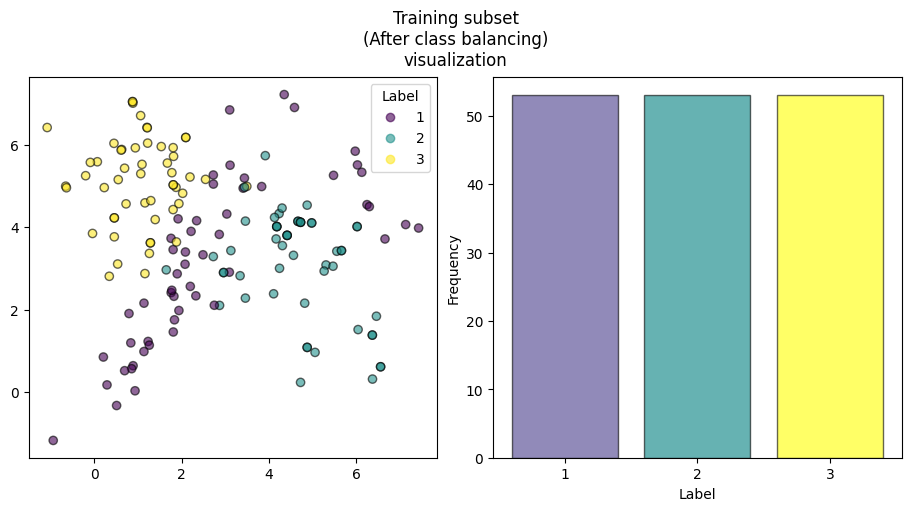

In [ ]:
plot_dataset(X_train, y_train)
plt.suptitle('Training subset\n(After class balancing)\nvisualization')
plt.show()

Έτσι, βλέπουμε ότι οι τρείς κλάσεις του training set βρίσκονται όλες πλέον στο ίδιο 'ύψος΄ και έτσι έχουμε πλέον ένα balanced training dataset.

Τέλος, το test set το κρατάμε στην αρχική, class imbalanced κατανομή (όπως φαίνεται και παρακάτω), ώστε να έχουμε μια ρεαλιστική ένδειξη της απόδοσης των παρακάτω μοντέλων μας!

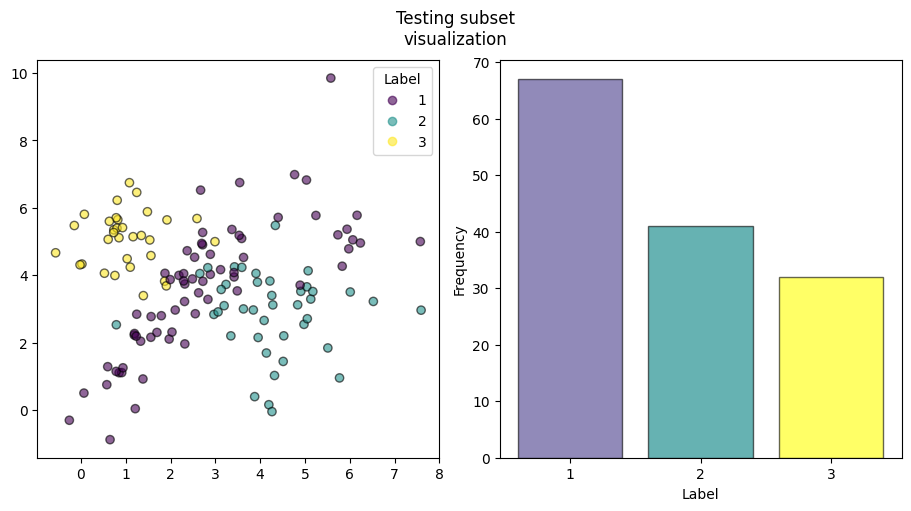

In [ ]:
plot_dataset(X_test, y_test)
plt.suptitle('Testing subset\nvisualization')
plt.show()

---

# **Μέρος Α**

Στην πράξη, δυστυχώς εδώ, δεν μπορούμε να εφαρμόσουμε τον ταξινομητή Bayes επειδή δεν γνωρίζουμε εάν το dataset (`X`) προέρχεται από μια κανονική κατανομή και δεν γνωρίζουμε τις πραγματικές παραμέτρους του πληθυσμού μας.

Επομένως, προσπαθούμε να προσεγγίσουμε τον ταξινομητή Bayes με:
- **Linear Discriminant Analysis (LDA)**
- **Quadratic Discriminant Analysis (QDA)**

Αυτές οι δύο μέθοδοι χρησιμοποιούν τη Maximum Likelihood τεχνική για την εκτίμηση των estimators, δηλαδή των διανυσμάτων μέσης τιμής και των πινάκων συνδιασποράς (χρησιμοποιώντας κανονικές κατανομές):

## Bayes Classifier (Same covariance matrix)

Στην 1η περίπτωση, θεωρούμε ότι τα Gaussians σε κάθε κλάση (1,2 και 3) μοιράζονται τον ίδιο πίνακα συνδιασποράς:

$$\begin{equation}
    \Sigma_1 = \Sigma_2 = \Sigma_3 = \Sigma
\end{equation}$$

, δηλαδή, οι διαφορετικές κατανομές των components είναι απλώς μετατοπισμένες εκδοχές η μία της άλλης (αφού έχουν ίδιο πίνακα συνδιασποράς με διαφορετικά κέντρα).

Επομένως, μιλάμε για τον **Linear Discriminant Analysis (LDA) classifier**.

O LDA θεωρεί πως τα δεδομένα είναι κανονικά κατανεμημένα και έχουν class-specific διάνυσμα μέσης τιμής.

Όταν αυτές οι υποθέσεις αυτές ισχύουν, τότε ο LDA προσεγγίζει τον Bayes ταξινομητή σε πολύ καλό βαθμό.

In [ ]:
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_train, y_train)

y_pred_LDA = model_LDA.predict(X_test).astype(int)

meanError_LDA = zero_one_loss(y_test, y_pred_LDA)
print("Bayes - Same covariance matrix - Mean Classification Error =", meanError_LDA)

Bayes - Same covariance matrix - Mean Classification Error = 0.22857142857142854


Παρακάτω δημιουργούμε την βοηθητική συνάρτηση που απεικονίζει τα test δεδομένα και τα χρωματίζει σύμφωνα με το πραγματικό τους label (Μώβ = 1, Μπλέ = 2, Κίτρινο = 3) ενώ και τα μαρκάρει με ειδικό σύμβολο αυτά που ταξινομήθηκαν λανθασμένα (`Ο` για αυτά που ταξινομήθηκαν ορθά, `Χ` για αυτά που ταξινομήθηκαν λανθασμένα). Επίσης απεικονίζει και τις περιοχές (regions) απόφασης που αντιστοιχούν σε κάθε κλάση, μετά την εκπαίδευση του μοντέλου, με τον ίδιο χρωματισμό με πρίν (δηλαδή Μώβ για την περιοχή όπου αν εντός της βρίσκεται το input του μοντέλου τότε σε αυτό θα δωθεί το label 1, Μπλέ το 2 και Κίτρινο το 3).

Η συνάρτηση έχει επίσης και την δυνατότητα να απεικονίσει και το training set με έναν άλλον διακριτό συμβολισμό (σχήμα ρόμβου) και κρατώντας πάλι τον ίδιο χρωματισμό για το πραγματικό του label του κάθε δείγματος.

Επίσης, έχει και την δυνατότητα να εμφανίσει και support vectors αν το μοντέλο είσοδου είναι τύπου `SVC` (χρειάζονται στο μέρος Γ της εργασίας) με συμβολισμό που κάνει τον ρόμβο διπλό (δηλαδή ένα train sample αν είναι support vector συμβολίζεται με διπλό ρόμβο).

In [ ]:
# This function is used for the plotting in this assignment. This function can plot the decision boundaries of a
# sklearn ML classification model, the test set, the train set (if desired). Also, if the ML model is a SVM, there is
# also the ability to plot the support vectors (not the hyperplane or the margins)
def plot_regions(model, X_test, y_test, y_pred, ax=None,
                 X=X, X_train=X_train, y_train=y_train,
                 dispTrainData=False,
                 dispSupportVectors=False):

    # Check if axes exists (used for subplotting)
    # If not, create a new figure
    if ax==None:
        # ax = plt.subplot(111)
        fig, ax = plt.subplots(figsize=(10, 6))

    # Plotting the decision boundaries
    disp = DecisionBoundaryDisplay.from_estimator(model,
                                                  X_test,
                                                  ax=ax,
                                                  grid_resolution=500,
                                                  response_method="predict",
                                                  alpha=0.6)

    # Plotting the misclassied testing data points
    misclassified_idx = np.where(y_test != y_pred)  # Find misclassified row indexes
    scatter_mis = disp.ax_.scatter(X_test[misclassified_idx, 0], X_test[misclassified_idx, 1],
                                   c = y_test[misclassified_idx],
                                   marker='X', s=50,
                                   edgecolor="k",
                                   alpha=0.6)

    # Plotting the correctly classified testing data points with a different symbol
    correctClassified_idx = np.where(y_test == y_pred)  # Find correct classified row indexes
    scatter_corr = disp.ax_.scatter(X_test[correctClassified_idx, 0], X_test[correctClassified_idx, 1],
                                    c = y_test[correctClassified_idx],
                                    marker='o',
                                    edgecolor="k",
                                    alpha=0.6)

    # Plotting the training dataset with a discrete marker
    if dispTrainData==True:
       scatter_train = disp.ax_.scatter(X_train[:, 0], X_train[:, 1],
                                        c = y_train,
                                        marker='D', s=15,
                                        edgecolor="k",
                                        alpha=0.5)

    # Legends
    # True label coloring legend
    corr_legend = plt.gcf().legend(*scatter_corr.legend_elements(),
                                   title='True Label Color',
                                   prop={'size': 9},
                                   loc='upper left', bbox_to_anchor=(0.5, 0), ncol=3)

    # Is correctly classified (?) legend
    corr_patch = plt.Line2D([0], [0], label='Test (Correctly Classified)', marker='o',
                            markersize=8,
                            markeredgecolor='k',
                            markerfacecolor='w',
                            linestyle='')
    miss_patch = plt.Line2D([0], [0], label='Test (Wrongly Classified)', marker='X',
                            markersize=8,
                            markeredgecolor='k',
                            markerfacecolor='w',
                            linestyle='')

    handles = [corr_patch, miss_patch]

    # Check if we need to display the marker of the train dataset
    if dispTrainData==True:
        train_patch = plt.Line2D([0], [0], label='Train', marker='D',
                                 markersize=8,
                                 markeredgecolor='k',
                                 markerfacecolor='w',
                                 linestyle='')
        handles.insert(0, train_patch)

    # Displaying the support vectors
    if dispSupportVectors==True:
        if type(model) == svm._classes.SVC:
            ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                       s=70,
                       marker='D',
                       facecolors='none',
                       edgecolor="k",
                       linewidths=1)

            # Support vector legend
            suppVec_patch = plt.Line2D([0], [0], label='Support Vector', marker='$\u27D0$',
                                       markersize=12,
                                       markeredgecolor='k',
                                       markerfacecolor='w',
                                       linestyle='')
            handles.insert(1, suppVec_patch)

    # All markers legend
    markersLeg = plt.gcf().legend(handles=handles, title='Dataset markers', ncol=1, prop={'size': 9},
                                  loc='upper right',
                                  bbox_to_anchor=(0.5, 0))
    ax.add_artist(corr_legend)

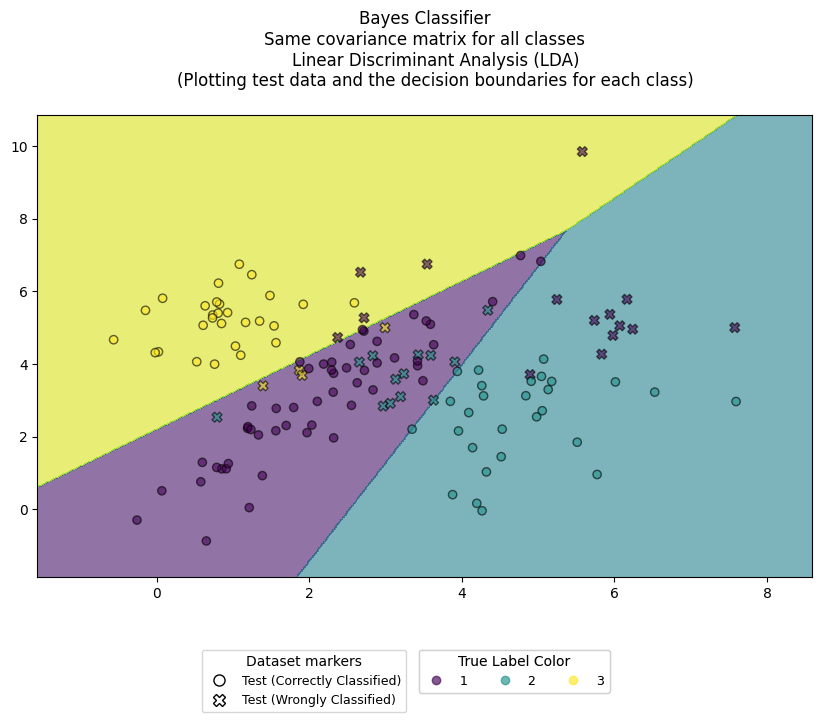

In [ ]:
plot_regions(model_LDA, X_test, y_test, y_pred_LDA)
plt.title("Bayes Classifier\nSame covariance matrix for all classes\n\
    Linear Discriminant Analysis (LDA)\n\
    (Plotting test data and the decision boundaries for each class)\n")
plt.show()

## Bayes Classifier (Different covariance matrix)

Στην 2η περίπτωση, θεωρούμε ότι τα Gaussians σε κάθε κλάση (1, 2 και 3) έχουν, το καθένα, διαφορετικό πίνακα συνδιασποράς:

$$\begin{equation}
    \Sigma_{j} ~~~\forall j = 1, 2, 3
\end{equation}$$

Επομένως, μιλάμε για τον **Quadratic Discriminant Analysis (QDA) classifier**.

In [ ]:
model_QDA = QuadraticDiscriminantAnalysis()
model_QDA.fit(X_train, y_train)

y_pred_QDA = model_QDA.predict(X_test).astype(int)

meanError_QDA= zero_one_loss(y_test, y_pred_QDA)
print("Bayes - Different covariance matrix - Mean Classification Error =", meanError_QDA)

Bayes - Different covariance matrix - Mean Classification Error = 0.18571428571428572


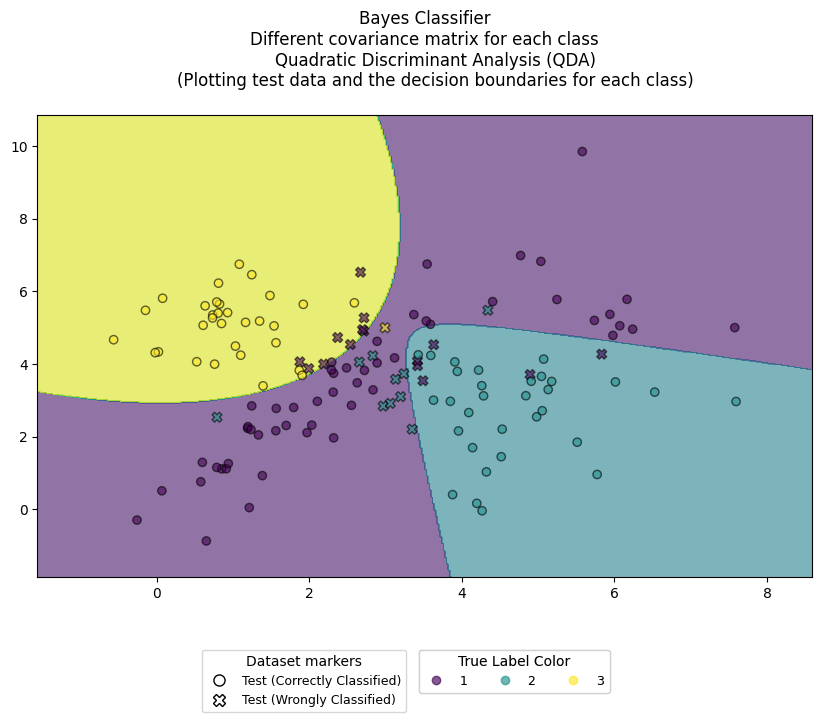

In [ ]:
plot_regions(model_QDA, X_test, y_test, y_pred_QDA)
plt.title("Bayes Classifier\nDifferent covariance matrix for each class\n\
    Quadratic Discriminant Analysis (QDA)\n\
    (Plotting test data and the decision boundaries for each class)\n")
plt.show()

## Σχολιασμός

Παρατηρούμε πως, από τις δύο παραπάνω προσεγγίσεις, **το καλύτερο αποτελεσμα το δίνει ο QDA Classifier** (Bayes Classifier με διαφορετικό πίνακα συνδιασποράς για κάθε κλάση), μέσω των περιοχών απόφασης αλλά κυρίως λόγω του μικρότερου μέσου σφάλματος (σε σχέση με τον LDA Classifier) ($e_{LDA}$ = 0.2285714 > 0.18571428 = $e_{QDA}$).

Από τις περιοχές απόφασης βλέπουμε πως ο LDA μπορεί να εκπαιδευτεί μόνο με γραμμικά όρια (απόφασης), ενώ ο QDA μπορεί να εκπαιδευτεί με τετραγωνικά όρια (μεταξύ κάθε κλάσης των δεδομένων εκπαίδευσης) και επομένως είναι και πιο ευέλικτος.

Οπτικά, μπορούμε να επιβεβαιώσουμε αυτό το αποτέλεσμα κοιτώντας την κατανομή του συνόλου εκπαίδευσης. Αν επιδιώξουμε να δούμε τις κανονικές κατανομές της κάθε κλάσης, θα δούμε ότι αυτές έχουν διαφορετικό σχήμα και μορφολογία, οπότε κατ' επέκταση διαφορετικές παραμέτρους κατανομής.

Το αποτέλεσμα είναι αναμενόμενο και αφού, όπως γνωρίζουμε από την βιβλιογραφία, όσο μεγαλώνει η διάσταση (αριθμός predictors)
στο dataset, o QDA Classifier πρέπει να υπολογίσει όλο και μεγαλύτερο αριθμό παραμέτρων το οποίο μπορεί, έτσι, να οδηγήσει
και σε μεγαλύτερο variance ή και σε προβλήματα overfitting. Εδώ, επείδη το dataset μας είναι μόλις 2 διαστάσεων, δεν φαίνεται να δημιουργείται τέτοιο πρόβλημα.

Επίσης, όταν οι κλάσεις του dataset (εδώ ειναι 3) έχουν πολύ διαφορετικούς πίνακες συνδιασποράς, o LDA θα 'υποφέρει' από υψηλά biases. Επείδη βλέπουμε ότι τα αποτελέσματα των δύο Bayes classifiers παραπάνω είναι αρκετά παραπλήσια (έχουν δηλαδή παραπλήσιες τιμές μέσου σφάλματος), καταλαβαίνουμε πως κάτι τέτοιο δεν ισχυεί.

---

# **Μέρος B**

## k - NN Classifier

Σε αυτό το μέρος εκπαιδεύουμε έναν ταξινομητή $k − NN$ χρησιμοποιώντας το ίδιο training set (και testing) με το **Μέρος Α**.   
Πιο συγκεκριμένα, θα εκπαιδεύσουμε μοντέλα για κάθε $k = 1, 2, ..., 10$, όπου $k$ ο αριθμός πλησιέστερων γειτόνων.    
Παρακάτω, για κάθε περίπτωση $k$, απεικονίζουμε τα testing δεδομένα καθώς και τις περιοχές απόφασης (regions) που αντιστοιχούν σε κάθε κλάση (label) (1, 2, ή 3).

Ο k - NN είναι επίσης ένας Bayes Classifier αλλά είναι μη παραμετρικός (μη-παραμετρικός βέβαια δεν σημαίνει ότι δεν έχει παραμέτρους), με μη σταθερό αριθμό παραμέτρων καθώς αυτοί αυξάνονται μαζί με τον αριθμό των training samples.

Αξίζει εδώ να σημειωθεί πως ο k - NN Classifier δεν υπολογίζει με ακρίβεια / σαφήνεια τα decision boundaries αλλα μπορούν να προκύψουν αλγοριθμικά.

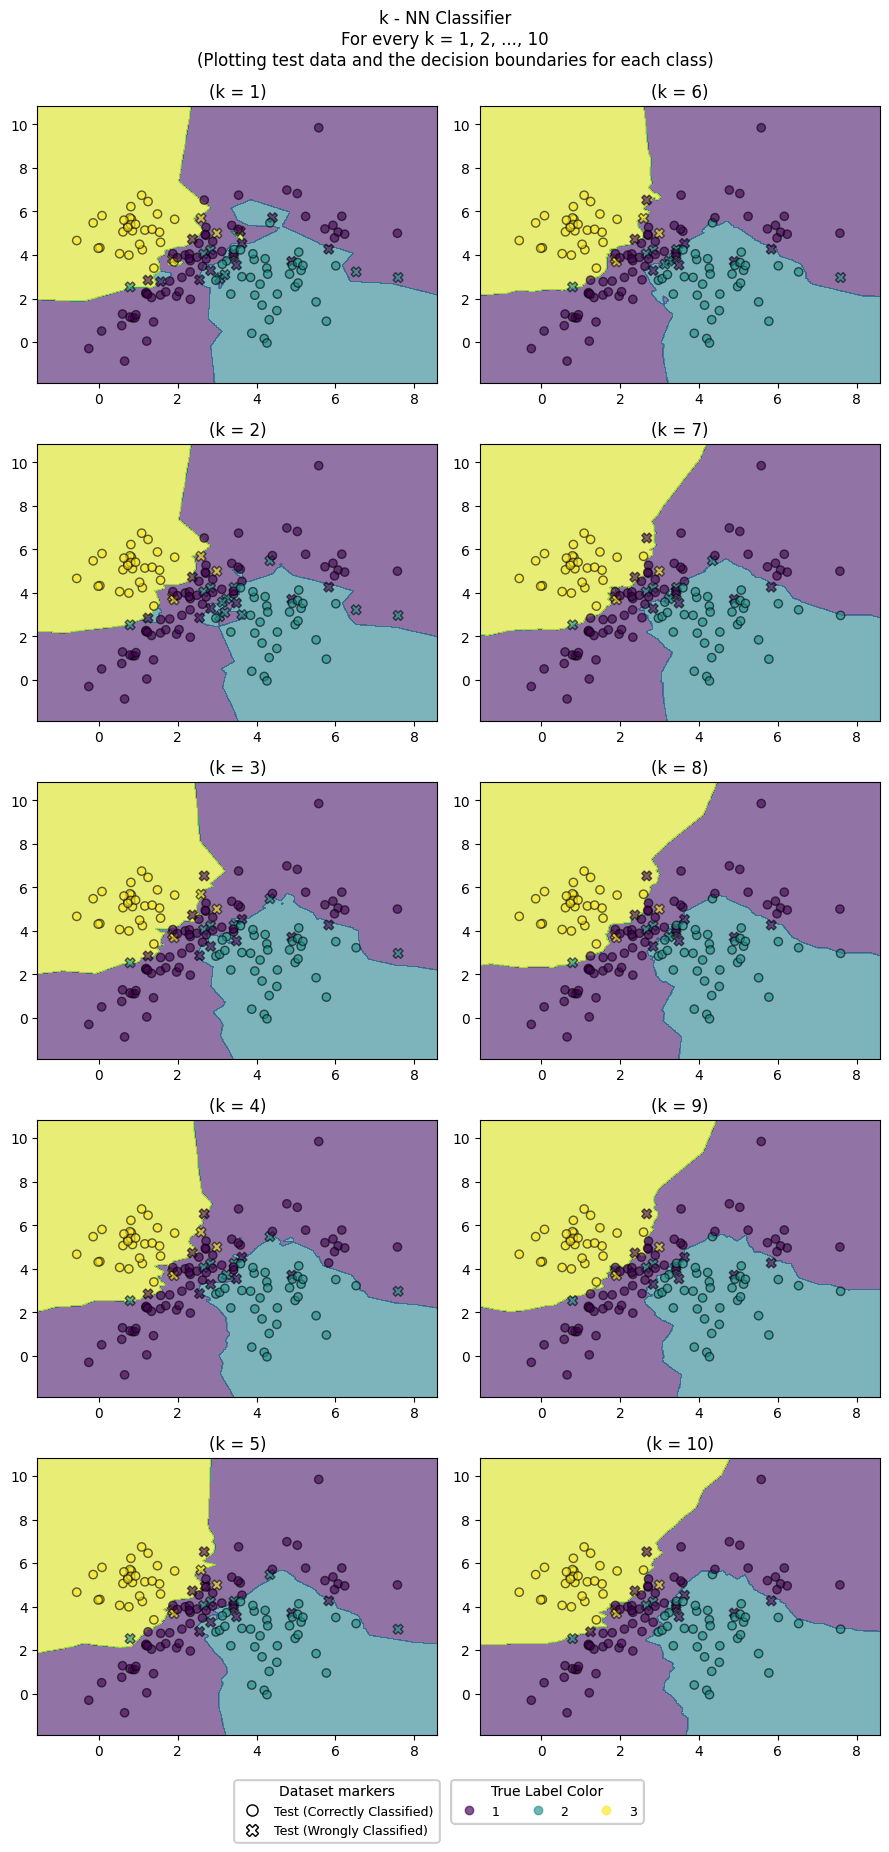

In [ ]:
# Run training process for every k = 1, 2, ..., 10
k_min = 1
k_max = 10

meanError_knn = np.zeros((k_max - k_min + 1,), dtype=np.float64)
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(9, 18))
ax = ax.T.flatten()
for k in range(k_min, k_max + 1):
    # Train model
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)

    # Get predicted labels for test set
    y_pred_knn = model_knn.predict(X_test).astype(int)

    # Calculate error
    meanError_knn[k - 1] = zero_one_loss(y_test, y_pred_knn)

    # Plot decision boundaries and test set
    plot_regions(model_knn, X_test, y_test, y_pred_knn, ax=ax[k - 1])
    ax[k - 1].title.set_text("(k = " + str(k) + ")")

fig.suptitle("k - NN Classifier\nFor every k = " + str(k_min) + ", " + str(k_min+1) + ", ..., " + str(k_max) + "\n\
    (Plotting test data and the decision boundaries for each class)\n")
fig.tight_layout()
plt.show()

Παρακάτω τώρα, για κάθε περίπτωση $k$, δίνουμε και το μέσο σφάλμα ταξινόμησης στο ίδιο test set με το προηγούμενο μέρος.

In [ ]:
display(pd.DataFrame({"Number of Neighbors (k)": range(k_min, k_max + 1),
                      "Mean Classification Error": meanError_knn}).style.hide())

Number of Neighbors (k),Mean Classification Error
1,0.164286
2,0.164286
3,0.135714
4,0.135714
5,0.142857
6,0.142857
7,0.121429
8,0.114286
9,0.107143
10,0.107143


Παρατηρούμε ότι (γενικά) όσο αυξάνουμε την τιμή του $k$ παρατηρούμε ότι μέσο σφάλμα ταξινόμησης έχει την τάση να μειώνεται (βέβαια η μείωση αυτή δεν είναι συνεχής/μονότονη, βλέπουμε δηλαδή όσο αυξάνεται το $k$ σε κάποια σημεία να αυξάνεται το σφάλμα). Αυτό προκαλείται επειδή για μικρές τιμές του $k$, το μοντέλο επιλέγει μόνο τις τιμές που είναι πιο κοντά στο δείγμα, σχηματίζοντας έτσι ένα πολύ περίπλοκο όριο απόφασης (όπως φαίνεται παραπάνω π.χ. για $k=1$ ή $k=2$). Αυτό οδηγεί και σε φαινόμενα υπερεκπαίδευσης και έτσι το μοντέλο δυσκολεύεται να δημιουργήσει μια επιφάνεια απόφασης η οποία να δύναται να γενικεύσει αρκετά ώστε να έχουμε ακριβείς προβλέψεις στο test dataset.

Αυξάνοντας την τιμή του $k$ βλέπουμε και από τα plots παραπάνω ότι τα όρια απόφασης γίνονται όλο και πιο ομαλά ("smooth") (συγκρίνοντας τα plots για $k=1$ και $k=10$) και γι' αυτό το μοντέλο καταφέρνει να κάνει καλύτερη γενίκευση για τα test data. Αν αυξήσουμε πολύ την τιμή του $k$, μπορεί να φτάσουμε να "κοιτάμε" σε training samples που δεν είναι καν γείτονες (είναι δηλαδή πολύ μακριά από το test sample).

Βέβαια δεν είναι σωστό να πούμε πως για $k=10$ παίρνουμε τα καλύτερα αποτελέσματα, δηλαδή δεν είναι σωστό να αξιολογήσουμε το μοντέλο απευθείας στο test set. Αν δηλαδή θέλαμε να κάνουμε "tune" την συγκεκριμένη υπερ-παράμετρο, θα έπρεπε να χρησιμοποιήσουμε κάποια μέθοδο για validation, δηλαδή κάποιο validation set ή cross-validation.

Εδώ αξίζει να σημειωθεί ένας άτυπος κανόνας που χρησιμοποιείται πολλές φορές που λεεί ότι καλό είναι να ισχυεί:

$$ \begin{equation}
    k < sqrt(n),~~ n~is~the~number~of~training~examples
\end{equation}$$

## Συγκριτικός Σχολιασμός

Παρατηρούμε ότι, ακόμη και για το πιο "κακό" $k-NN$ μοντέλο λαμβάνουμε καλύτερα αποτελέσματα από τους Bayes ταξινομητές (LDA και QDA), παρόλο που ο $k-NN$ classifier είναι και ο ίδιος ένας Bayes ταξινομητής (αλλά είναι μη παραμετρικός) ($e_{LDA}$ = 0.2285714 > 0.18571428 = $e_{QDA}$ > 0.164286 = $e_{k-NN_{k=1}}$). Αυτό μπορεί να αποδοθεί στην ιδιότητα του $k-NN$ classifier να δημιουργεί περιοχές απόφασης βγαλμένες από τα δεδομένα, και όχι αναλυτικά προσδιοριζόμενες από κάποια γραμμική ή τετραγωνική εξίσωση. Παρατηρώντας το σύνολο των δεδομένων μας, βλέπουμε ότι ο βέλτιστος χωρισμός τους δεν πραγματοποιείται από κάποια ευθεία ή παραβολική γραμμή, καθώς πολλά από τα δεδομένα μας βρίσκονται πολύ κοντά σε δεδομένα άλλων κλάσεων και οι τελικές διαχωριστικές γραμμές αποτελούν πιο περίπλοκη γεωμετρία.

Προφανώς, δίνοντας στο μοντέλο μεγαλύτερη ικανότητα διερεύνησης αυξάνοντας την παράμετρο $k$, βλέπουμε ότι για το σύνολο δεδομένων μας και την μορφολογία του, έχουμε καταφέρει να πετύχει αρκετά καλά αποτελέσματα. Θυμίζοντας τον ορισμό του μέσου σφάλματος ταξινόμησης, βλέπουμε ότι έχουμε πετύχει βέλτιστη ακρίβεια κοντά στο 90% (~89.3%).

---

# **Μέρος Γ**

Στην πιο απλή του μορφή, τα SVMs δεν "υποστηρίζουν" multiclass classification αλλά υποστηρίζουν binary classification και χωρίζουν τα datapoints σε δύο μέρη. Για multiclass classification, πρέπει να σπάσει το πρόβλημα σε πολλαπλά binary classification προβλήματα.

Στην εργασία μας (αφού είναι και default parameter της SVC για multiclass classification) επιλέγουμε να κάνουμε ένα One-vs-Rest approach (`decision_function_shape=ovr` (Default)), όπου ουσιαστικά ο κώδικας μας, εσωτερικά και κρυφά, για το N = 3 class classification πρόβλημα μας, δημιουργεί N = 3 SVMs όπου ουσιαστικά:

- Το SVM #1 μαθαίνει το class_output = 1 vs class_output $\neq$ 1
- Το SVM #2 μαθαίνει το class_output = 2 vs class_output $\neq$ 2
- Το SVM #3 μαθαίνει το class_output = 3 vs class_output $\neq$ 3

Επίσης, εδώ πέρα στα plots μας, θα εκτυπώνουμε και τα Support Vectors (με διακριτό συμβολισμό) κάθε φορά, που ουσιαστικά είναι τα training datapoints που βρίσκονται στην ελάχιστη απόσταση από το υπερεπίπεδο (hyperplane). Βέβαια, αυτό το κάνουμε μέσω της μεταβλητής `model.support_vectors_` και όχι μέσω κάποιου δικού μας υπολογισμού.

## SVM (Linear Kernel) Classifier

Σε αυτό το μέρος εκπαιδεύουμε SVM ταξινομητή με γραμμικό (linear) kernel χρησιμοποιώντας το ίδιο training set (και testing) με το **Μέρος Α** και **Μέρος Β**. Παρακάτω υπολογίζουμε το μέσο σφάλμα στο ίδιο test set με τα προηγούμενα μέρη.

Το Linear kernel ουσιαστικά θα υπολογίσει το dot product των input samples για κάθε συνδυασμό samples στο dataset και ανάλογα με το πόσο υψηλή τιμή θα προκύψει, τόσο πιο όμοια θα είναι τα samples αυτά.

In [ ]:
# Train model
model_linearSVM = svm.SVC(kernel='linear', random_state=42)
model_linearSVM.fit(X_train, y_train)

# Get predicted labels for test set
y_pred_linSVM = model_linearSVM.predict(X_test).astype(int)

# Calculate error
meanError_linSVM = zero_one_loss(y_test, y_pred_linSVM)
print("Linear SVM - Mean Classification Error =", meanError_linSVM)

Linear SVM - Mean Classification Error = 0.19999999999999996


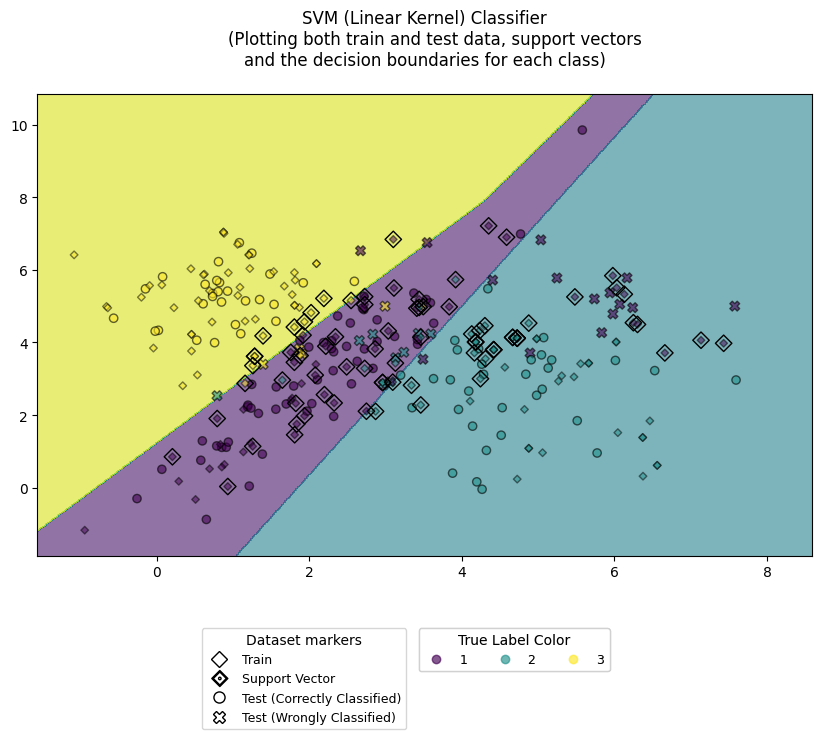

In [ ]:
plot_regions(model_linearSVM, X_test, y_test, y_pred_linSVM,
             dispTrainData=True,
             dispSupportVectors=True)
plt.title("SVM (Linear Kernel) Classifier\n\
    (Plotting both train and test data, support vectors\nand the decision boundaries for each class)\n")
plt.show()

Παρατηρούμε ότι, όπως υποδεικνύει και το όνομά του, το γραμμικό SVM διαχωρίζει τις περιοχές απόφασης με ευθείες γραμμές, συγκεκριμένα με 3 (εφόσον έχουμε 3 κλάσεις απόφασης). Οι γραμμές αυτές είναι τα εκφυλισμένα hyperplanes απόφασης στο δισδιάστατο επίπεδο.

Λόγω της έλλειψης εκφραστικότητας του linear kernel, τα trained classes δεν αποτυπώνουν τέλεια τα δεδομένα εκπαίδευσης.

## SVM (RBF Kernel) Classifier

Σε αυτό το μέρος εκπαιδεύουμε διάφορους SVM ταξινομητές με Radial basis function (rbf) kernel χρησιμοποιώντας το ίδιο training set (και testing) με το **Μέρος Α** και **Μέρος Β**. Παρακάτω, κιόλας, πειραματιζόμαστε με τις υπερπαραμέτρους του.

Το RBF kernel (γνωστό και ως Gaussian) ουσιαστικά υπολογίζει το πόσο όμοια είναι δύο datapoints στις άπειρες διαστάσεις και τότε προσεγγίζει το classification με την διαδικασία της "πλειοψηφίας".

### Πειραματισμός με υπερπαραμέτρους


Ένα RBF kernel SVM έχει δύο υπερπαραμέτρους:
- την παράμετρος κανονικοποίησης C (`C`)
- τον συντελεστή του kernel $\gamma$ (`gamma`)

Διαισθητικά, το $\gamma$ ελέγχει την επιρροή κάθε μεμονωμένου δείγματος του test set στα όρια απόφασης, με τις χαμηλές τιμές να 'σημαίνουν' 'μακρία' και τις μεγάλες τιμές να 'σημαίνουν' 'κοντά'. Μπορεί να θεωρηθεί ως το αντίστροφο της ακτίνας επιρροής των δειγμάτων που επιλέγονται από το μοντέλο ως support vectors.

Η παράμετρος C αντισταθμίζει τη σωστή ταξινόμηση των δειγμάτων εκπαίδευσης έναντι της μεγιστοποίησης του περιθωρίου (margin) της συνάρτησης απόφασης. Για μεγαλύτερες τιμές του C, ένα μικρότερο περιθώριο θα γίνει αποδεκτό εάν η συνάρτηση απόφασης είναι καλύτερη στην ορθή ταξινόμηση όλων των σημείων εκπαίδευσης. Ένα χαμηλότερο C θα δώσει ένα μεγαλύτερο περιθώριο, επομένως και μια πιο απλή συνάρτηση απόφασης, με κόστος την αύξηση του σφάλματος εκπαίδευσης.

Παρακάτω θα πειραματιστούμε με τις υπερπαραμέτρους αυτές για να εξάγουμε κάποια συμπεράσματα.

Το πρώτο plot είναι ένα heatmap με το μέσο σφάλμα του ταξινομητή, στο ίδιο test set με τα προηγούμενα μέρη της εργασίας, ως συνάρτηση του $C$ και του $\gamma$. Εδώ, παράγουμε ένα σχετικά μέγαλο grid για λόγους visualization. Πιο συγκεκριμένα, έχουμε ενα λογαριθμικό grid με τιμές από $10^{-2}$ μέχρι $10^{10}$ για το $C$ και με τιμές από $10^{-9}$ μέχρι $10^{3}$ για το $\gamma$ .

In [ ]:
# Grid search ranges for heatmap
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)

meanError_rbfSVM = []
for C in C_range:
    for gamma in gamma_range:
        # Train model
        model_rbfSVM = svm.SVC(kernel='rbf', random_state=42, C=C, gamma=gamma)
        model_rbfSVM.fit(X_train, y_train)

        # Get predicted labels for test set
        y_pred_rbfSVM = model_rbfSVM.predict(X_test).astype(int)

        # Calculate error
        meanError_rbfSVM.append(zero_one_loss(y_test, y_pred_rbfSVM))

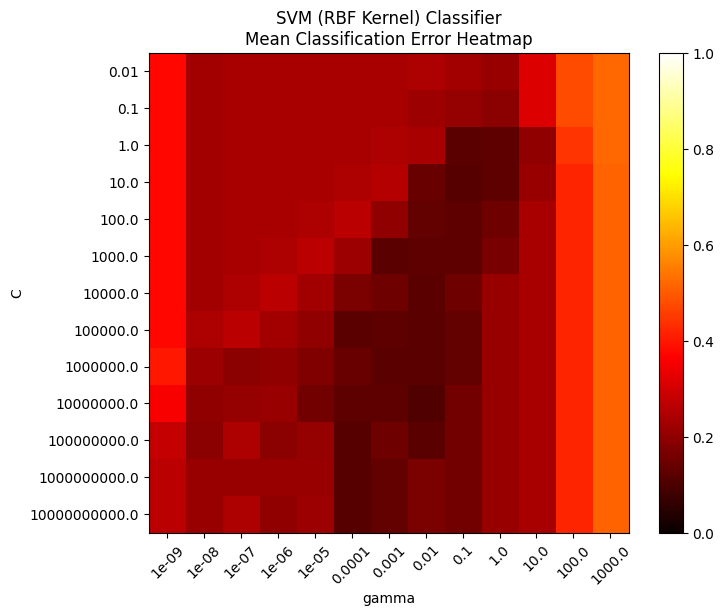

In [ ]:
# Display a heatmap for the error as the hyperparameters change
meanError_rbfSVM = np.array(meanError_rbfSVM).reshape(len(C_range), len(gamma_range))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(meanError_rbfSVM,
           interpolation="nearest",
           cmap=plt.cm.hot,
           vmin = 0, vmax=1)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("SVM (RBF Kernel) Classifier\nMean Classification Error Heatmap")
plt.show()

Το δεύτερο plot κάνει μια οπτικοποίηση των περιοχών κάθε κλάσης ενώ απεικονίζει, χρησιμοποιώντας διακριτό συμβολισμό, τα train set, test set, support vectors και δείγματα με λάθος ταξινόμηση για ένα μικρότερο, σε σχέση με πριν, grid τιμών. Πιο συγκεκριμένα, έχουμε ενα grid με το $C$ (`C`) $\in \{ 10^{-2},~1,~10^{2} \}$ και με το $\gamma$ (`gamma`) $\in \{ 10^{-2},~1,~10^{1} \}$.

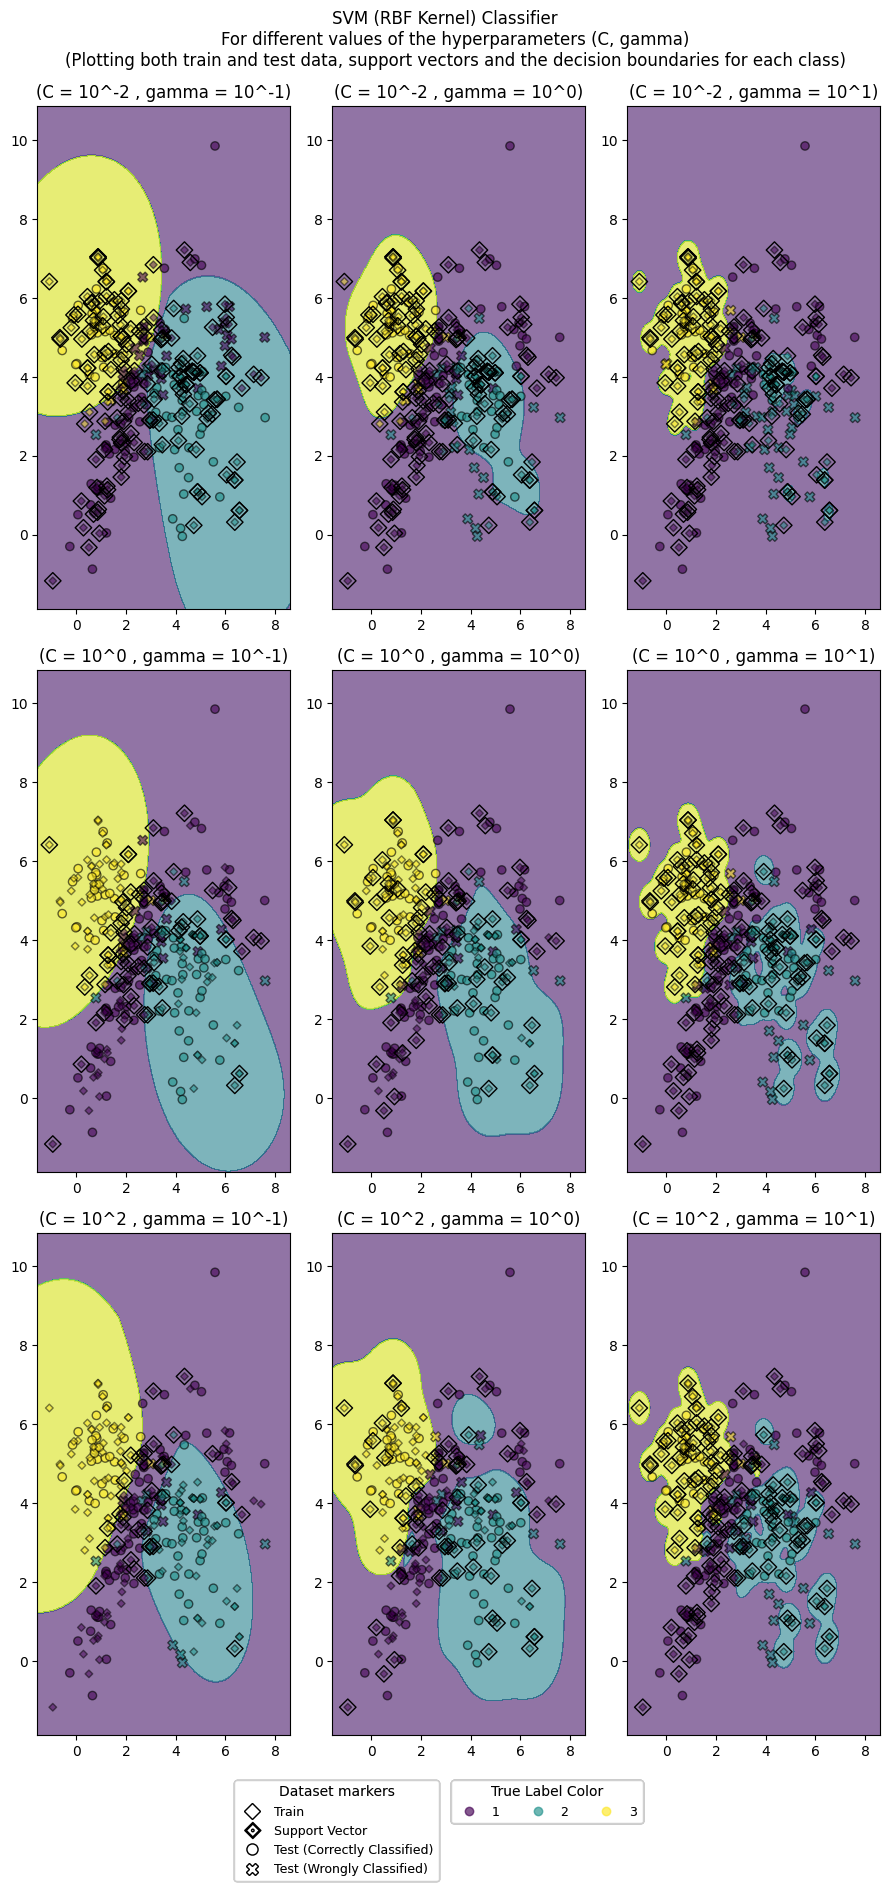

In [ ]:
# Grid search values for plotting
C_range = [1e-2, 1, 1e2]
gamma_range = [1e-1, 1, 1e1]

meanError_rbfSVM = np.zeros((len(C_range), len(gamma_range)), dtype=np.float64)
meanError_rbfSVM_df = pd.DataFrame(columns=['C', 'gamma', 'Mean Classification Error'])
fig, ax = plt.subplots(nrows=len(C_range), ncols=len(gamma_range), figsize=(9, 18))
for i in range(len(C_range)):
    for j in range(len(gamma_range)):
        # Train model
        model_rbfSVM = svm.SVC(kernel='rbf', random_state=42, C=C_range[i], gamma=gamma_range[j])
        model_rbfSVM.fit(X_train, y_train)

        # Get predicted labels for test set
        y_pred_rbfSVM = model_rbfSVM.predict(X_test).astype(int)

        # Calculate error
        meanError_rbfSVM[i][j] = zero_one_loss(y_test, y_pred_rbfSVM)
        meanError_rbfSVM_df = pd.concat([meanError_rbfSVM_df,
                                         pd.DataFrame.from_records([{'C': C_range[i],
                                                                     'gamma': gamma_range[j],
                                                                     'Mean Classification Error': meanError_rbfSVM[i][j]}]
                                                                   )])

        # Plot decision boundaries, train and test set, support vectors
        plot_regions(model_rbfSVM, X_test, y_test, y_pred_rbfSVM, ax=ax[i][j],
                     dispTrainData=True,
                     dispSupportVectors=True)
        ax[i][j].title.set_text("(C = 10^" + str(int(np.log10(C_range[i])))
                                + " , gamma = 10^" + str(int(np.log10(gamma_range[j]))) + ")")

fig.suptitle("SVM (RBF Kernel) Classifier\n\
    For different values of the hyperparameters (C, gamma)\n\
    (Plotting both train and test data, support vectors and the decision boundaries for each class)\n")
fig.set_tight_layout(True)
plt.show()

Παρακάτω τώρα, για κάθε περίπτωση ζεύγους τιμής παραμέτρων (`C`, `gamma`) από τα παραπάνω διαγράμματα, δίνουμε και το μέσο σφάλμα ταξινόμησης στο ίδιο test set με τα προηγούμενα μέρη.

In [ ]:
display(meanError_rbfSVM_df.style.hide())

C,gamma,Mean Classification Error
0.010000,0.100000,0.228571
0.010000,1.000000,0.214286
0.010000,10.000000,0.314286
1.000000,0.100000,0.121429
1.000000,1.000000,0.128571
1.000000,10.000000,0.200000
100.000000,0.100000,0.128571
100.000000,1.000000,0.150000
100.000000,10.000000,0.235714


Από το δεύτερο plot παρατηρούμε πως η συμπεριφορά του μοντέλου είναι πολύ ευαίσθητη στην υπερπαράμετρο $\gamma$. Εάν το $\gamma$ είναι πολύ μεγάλο, η ακτίνα της περιοχής επιρροής των support vectors περιλαμβάνει, σε πολλές περιπτώσεις, μόνο το ίδιο το support vector και καμία κανονικοποίηση με το C δεν φαίνεται να μπορεί να αποτρέψει το overfitting (Βλ. σχήματα με $\gamma$ = 10 ή heatmap όπου για $\gamma$ = 1000 έχουμε στήλη με το ίδιο χρώμα/σφάλμα).

Από την άλλη, όταν το $\gamma$ είναι πολύ μικρό, το μοντέλο είναι πολύ περιορισμένο και δεν μπορεί να συλλάβει την πολυπλοκότητα ή το «σχήμα» των test data.

Στην περίπτωση μας μάλιστα παρατηρούμε οτι γενικά για $\gamma = 0.1$ λαμβάνουμε τα πιο συγκεντρωμένα - καλύτερα αποτελέσματα (με τα μικρότερα μέσα σφάλματα, όπως φαίνεται από τον πίνακα παραπάνω). Παρατηρώντας τις οπτικοποιήσεις των περιοχών απόφασης, βλέπουμε ότι οι βέλτιστες τιμές ουσιαστικά "συγκεντρώνουν" τις περιοχές απόφασης γύρω από το σύνολο δοκιμής. Αυτό ίσως να μας οδηγούσε σε φαινόμενα υπερεκπαίδευσης αν τα δεδομένα εκπαίδευσης και δοκιμής δεν ήταν τόσο στενά συσχετισμένα.

Γενικά, από το heatmap, μπορούμε να δούμε ότι κάλα μοντέλα μπορούμε να πάρουμε σε ένα μέρος μιας διαγωνίου των $\gamma$ και $C$. Η διαγώνιος προκύπτει γιατί όσο μειώνουμε την τιμή του $\gamma$ παίρνουμε μοντέλα με πιο ομαλά όρια απόφασης τα οποία μπορούν να γίνουν πιο 'περίπλοκα' αυξάνοντας τη σημασία της σωστής ταξινόμησης κάθε σημείου, δηλαδή να αυξηθεί η δυνατότητα της γενικέυσης, το οποίο γίνεται αυξάνοντας το $C$. Αυτό φαίνεται και πιο εύκολα στον πίνακα σφαλμάτων όπου βλέπουμε ότι $e_{\gamma=1~,~C=1} = e_{\gamma=0.1~,~C=100}$ Από τη στιγμή που το dataset μας έχει πολλά "συγκεντρωμένα" σημεία, έτσι μπορούμε να βρούμε την κατάλληλη τιμή ώστε να έχουμε ακριβείς προβλέψεις, αλλά και να μην στερούμε από το μοντέλο μας την ικανότητα της γενίκευσης. .

Από το heatmap παρατηρούμε επίσης πως για μεσαίες τιμές του $\gamma$, δηλαδή τιμές του μέσα (ή και κόντα) στο εύρος $[10^{-3},~10^{1}]$, και για μεγάλες τιμές του $C$, δηλαδή τιμές του μέσα (ή και κόντα) στο εύρος $[10^{9},~10^{10}]$, παίρνουμε μοντέλα τα οποία φαίνεται να δίνουν περίπου το ίδιο μέσο σφάλμα στο test set (έχουν ίδιο χρωματισμό στο heatmap). Αυτό σημαίνει πως και τα support vectors δεν αλλάζουν.

Αξίζει να σημειωθεί πως φαίνεται πως οι μικρές τιμές του $C$ γενικά να οδηγούν σε περισσότερα support vectors.

Συγκρίνοντας τα δύο SVM, με τα διαφορετικά kernels, πως ένα SVM με RBF kernel και την σωστή επιλογή τιμών για τις υπερπαραμέτρους πετυχαίνει πολύ καλύτερα από ένα με linear kernel (π.χ. βλέπουμε ότι $e_{linear~SVM} = 0.1999 > 0.12857 = e_{RBF~SVM_{~C=1~,~\gamma=1}}$)

## Συγκριτικός Σχολιασμός

Από τις μετρικές των σφαλμάτων, βλέπουμε ότι το γραμμικό SVM καταφέρνει απόδοση λίγο καλύτερη από τους ταξινομητές Bayes (LDA, QDA). Όπως θα αναμέναμε, το SVM με RBF kernel, λόγω και της επιπρόσθετης πολυπλοκότητας που έχει, επιτυγχάνει πολύ καλύτερη απόδοση, και πλησιάζει την καλύτερη απόδοση από όλα τα μοντέλα που έχουν δοκιμαστεί. Βέβαια, το μοντέλο με SVM θεωρεί πως υπάρχει ένα hyper-plane που μπορεί να διαχωρίσει τα δεδομένα (που είναι μια αρκετά περιοριστική υπόθεση αλλά φαίνεται να λειτουργεί για το dataset μας εδω)

Παρατηρούμε επίσης ότι οι τιμές των υπερπαραμέτρων μπρούν να μας δώσουν ένα μοντέλο που πλησιάζει την μέγιστη ακρίβεια που έχει σημειωθεί ως τώρα, αλλά και να μας δώσει ένα μοντέλο που είναι χειρότερο ακόμη κι από έναν απλό γραμμικό ταξινομητή Bayes. Επομένως, σαφώς το να βρούμε ένα ικανοποιητικά καλό μοντέλο είναι ακόμη πιο δύσκολο από τις προηγούμενες περιπτώσεις (πραγματοποιούμε grid search με δικά μας όρια και ανάλυση στα διανύσματα αναζήτησης ή και κάποιο validation set).

Μια διαφορά που μπορούμε να παρατηρήσουμε είναι ότι στα SVM RBF μοντέλα με χαμηλό σφάλμα, οι περιοχές απόφασης των κλάσεων 1 και 3 είναι πολύ συγκεντρωμένες στα δεδομένα μας, σε αντίθεση με το μοίρασμα που γίνεται με τους άλλους ταξινομητές. Ενδεχομένως λοιπόν σε περίπτωση που το dataset μας ήταν πιο γενικευμένο, να παρατηρούσαμε φαινόμενα υπερεκμάθησης, και ένας ταξινομητής $k-NN$ να ήταν καλύτερη επιλογή.